In [46]:
library(dplyr)
library(ggplot2)
library(EnhancedVolcano)
library(DOSE)
library(tibble)
library(reshape2)
library(ggpubr)
library(rstatix)
library(ggprism)
library(wesanderson)

## Figure 1B

In [47]:
vdata <- read.csv('../Data/Metaboanalyst_4.12.21/volcano.csv', row.names = 1)

In [48]:
sig.vdata <- vdata[vdata$p.ajusted < 0.05, ]

In [49]:
vdata$Sig <- 'NS'
vdata[((vdata$p.ajusted < 0.05) & (vdata$log2.FC. < -0.58)), c(5)] <- 'Down'
vdata[((vdata$p.ajusted < 0.05) & (vdata$log2.FC. > 0.58)), c(5)] <- 'Up'

In [50]:
names.keyvals <- vdata$Sig

In [51]:
names.keyvals[names.keyvals == 'NS'] <- 'grey'
names.keyvals[names.keyvals == 'Down'] <- wes_palette("IsleofDogs1")[1]
names.keyvals[names.keyvals == 'Up'] <- wes_palette("IsleofDogs2")[3]

In [52]:
names <- rownames(vdata)
names <- replace(names, names=="NAD+_posi", "NAD+")
names <- replace(names, names=="tryptophan", "Tryptophan")
names <- replace(names, names=="nicotinamide", "Nicotinamide")

In [53]:
rownames(vdata) <- names

In [54]:
shapes.keyvals <- rep(20, nrow(vdata))
shape.names <- rep('Other', nrow(vdata))

shapes.keyvals[names == 'NAD+'] <- 19
shape.names[names == 'NAD+'] <- 'Tryptophan\npathway'

shapes.keyvals[names == 'Tryptophan'] <- 19
shape.names[names == 'Tryptophan'] <- 'Tryptophan\npathway'

shapes.keyvals[names == 'Nicotinamide'] <- 19
shape.names[names == 'Nicotinamide'] <- 'Tryptophan\npathway'

shapes.keyvals[names == 'Kynurenic acid'] <- 19
shape.names[names == 'Kynurenic acid'] <- 'Tryptophan\npathway'

shapes.keyvals[names == 'Kynurenine'] <- 19
shape.names[names == 'Kynurenine'] <- 'Tryptophan\npathway'

In [55]:
names(shapes.keyvals) <- shape.names

In [56]:
names(names.keyvals) <- vdata$Sig

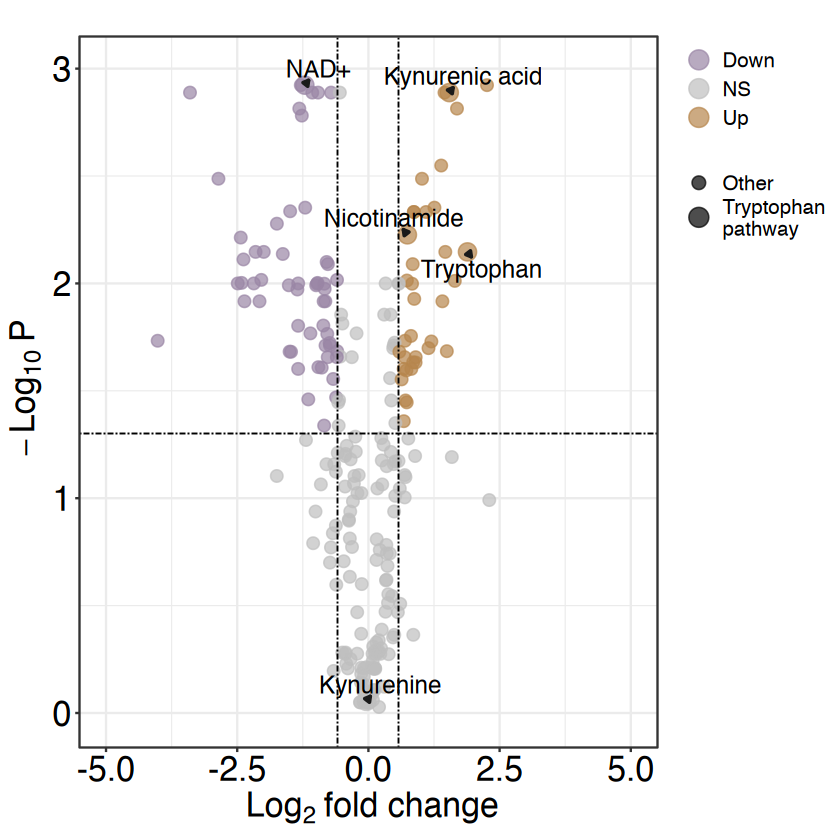

In [57]:
EnhancedVolcano(vdata,
    lab = rownames(vdata),
    selectLab = c('Kynurenic acid', 'Tryptophan', 'Kynurenine', 'Nicotinamide', 'NAD+'),
    x = 'log2.FC.',
    y = 'p.ajusted',
    xlim = c(-5, 5),
    ylim = c(-0.01, 3),
    title = NULL,
    colCustom = names.keyvals,
    shapeCustom = shapes.keyvals,
    cutoffLineType = 'twodash',
    subtitle = ' ',
    colAlpha = 0.7,
    pCutoff = 0.05,
    FCcutoff = 0.58,
    borderWidth = 0.02,
    pointSize = 4.5,
    drawConnectors = TRUE,
    lengthConnectors = unit(0.01, "npc"),
    widthConnectors = 0.8,
    legendLabels=c('', 'Not sig', 'Sig'),
    caption = NULL,
    captionLabSize = 46,
    labSize = 5.)+
    theme_dose(20)+
    theme(legend.text=element_text(size=12), 
          legend.title = element_blank(), 
          legend.justification = c("right", "top"))

## Figure 1C

In [58]:
data.normalized <- read.csv('../Data/Metaboanalyst_4.12.21/data_normalized.csv')
data.normalized <- column_to_rownames(data.normalized, var = 'X')
data.normalized <- data.normalized[-c(1),]
data.normalized <- as.data.frame(sapply(data.normalized, as.numeric), row.names = rownames(data.normalized))

In [59]:
d <- data.normalized[c('NAD+_posi', 'NAD+_nega', 'acetyl-CoA-posi', 'Kynurenic acid', 'Kynurenine', 'quinolinate'),]

In [60]:
colnames(d) <- c('S6KO-1', 'S6KO-2', 'S6KO-3', 'Control-1', 'Control-2', 'Control-3')

In [61]:
d <- as.data.frame(t(d))

In [62]:
d$genotype <- c('SIRT6 KO', 'SIRT6 KO', 'SIRT6 KO', 'WT', 'WT', 'WT')

In [63]:
d$genotype <- factor(d$genotype, levels = c("WT", "SIRT6 KO"))

In [64]:
d <- melt(d)

Using genotype as id variables



In [65]:
head(d)

,genotype,variable,value
,<fct>,<fct>,<dbl>
1,SIRT6 KO,NAD+_posi,0.8241155
2,SIRT6 KO,NAD+_posi,0.8412724
3,SIRT6 KO,NAD+_posi,0.8382146
4,WT,NAD+_posi,1.1994040
5,WT,NAD+_posi,1.1753147
6,WT,NAD+_posi,1.2224245


In [68]:
pvals <- d %>%
        rstatix::group_by(variable) %>%
        rstatix::pairwise_t_test(value ~ genotype, p.adjust.method = "fdr") %>%
        rstatix::add_significance(p.col = "p.adj") %>%
        rstatix::add_x_position(x = "genotype")

pvals$y.position <- c(1.3, 0.8, -1.13, 0.36, -0.77, -0.84)

In [66]:
vdata.pvals <- vdata[c('NAD+_posi', 
                       'NAD+_nega', 
                       'acetyl-CoA-posi', 
                       'Kynurenic acid', 
                       'Kynurenine', 
                       'quinolinate'), ]

In [69]:
p1 <- ggplot(data=d[d$variable == 'NAD+_posi', ], aes(x = genotype, y = value)) +
    geom_jitter(aes(color = genotype), 
                position = position_jitterdodge(jitter.width = 0.1), 
                size = 5)+
    xlab('')+
    scale_y_continuous(limits = c(0.8, 1.32), breaks = seq(0.8, 1.3, 0.1))+ 
    theme_dose(14)+
    ylab(bquote(~log[2]~ '(Relative abundance)'))+
    ggtitle(bquote(NAD^+""))+
    scale_color_manual(values=c("steelblue", "#8b0000"))+
    scale_fill_manual(values=c("steelblue", "#8b0000"))+
    stat_summary(aes(group=genotype), position=position_dodge(.5), 
                 geom = "errorbar", width = 0.145, size = 1.3, fun.min = min, fun.max = max)+
    stat_summary(aes(group=genotype), position=position_dodge(.5), fun = mean, na.rm = TRUE, 
               geom = "point", color = "black", 
               size = 10, shape = "-") +

    add_pvalue(pvals[c(1),],  
               tip.length = 0.02, 
               xmin = "xmin", 
               xmax = "xmax",
               label.size = 5, 
               bracket.size = 0.7)+

    theme(axis.text.x=element_text(color = "black", angle=45, vjust=.8, hjust=0.8))+
    theme(legend.position = 'none')



p3 <- ggplot(data=d[d$variable == 'acetyl-CoA-posi', ], aes(x = genotype, y = value)) +
    geom_jitter(aes(color = genotype), 
                position = position_jitterdodge(jitter.width = 0.1), 
                size = 5)+
    xlab('')+
    scale_y_continuous(limits = c(-1.8, -1.1), breaks = seq(-1.8, -1.2, 0.2))+
    theme_dose(14)+
    ylab(NULL)+
    ggtitle("Acetyl-CoA")+
    scale_color_manual(values=c("steelblue", "#8b0000"))+
    scale_fill_manual(values=c("steelblue", "#8b0000"))+
    stat_summary(aes(group=genotype), position=position_dodge(.5), 
                 geom = "errorbar", width = 0.145, size = 1.3, fun.min = min, fun.max = max)+
    stat_summary(aes(group=genotype), position=position_dodge(.5), fun = mean, na.rm = TRUE, 
               geom = "point", color = "black", 
               size = 10, shape = "-") +

    add_pvalue(pvals[c(3),],  
               tip.length = 0.02, 
               xmin = "xmin", 
               xmax = "xmax",
               label.size = 5, 
               bracket.size = 0.7)+

    theme(axis.text.x=element_text(color = "black", angle=45, vjust=.8, hjust=0.8))+
    theme(legend.position = 'none')


p4 <- ggplot(data=d[d$variable == 'Kynurenic acid', ], aes(x = genotype, y = value)) +
    geom_jitter(aes(color = genotype), 
                position = position_jitterdodge(jitter.width = 0.1), 
                size = 5)+
    xlab('')+
    scale_y_continuous(limits = c(-0.4, 0.4), breaks = seq(-0.4, 0.4, 0.2))+ 
    theme_dose(14)+
    ylab(NULL)+
    ggtitle("Kynurenic\nacid")+
    scale_color_manual(values=c("steelblue", "#8b0000"))+
    scale_fill_manual(values=c("steelblue", "#8b0000"))+
    stat_summary(aes(group=genotype), position=position_dodge(.5), 
                 geom = "errorbar", width = 0.145, size = 1.3, fun.min = min, fun.max = max)+
    stat_summary(aes(group=genotype), position=position_dodge(.5), fun = mean, na.rm = TRUE, 
               geom = "point", color = "black", 
               size = 10, shape = "-") +

    add_pvalue(pvals[c(4),],  
               tip.length = 0.02, 
               xmin = "xmin", 
               xmax = "xmax",
               label.size = 5, 
               bracket.size = 0.7)+

    theme(axis.text.x=element_text(color = "black", angle=45, vjust=.8, hjust=0.8))+
    theme(legend.position = 'none')


p5 <- ggplot(data=d[d$variable == 'Kynurenine', ], aes(x = genotype, y = value)) +
    geom_jitter(aes(color = genotype), 
                position = position_jitterdodge(jitter.width = 0.1), 
                size = 5)+
    xlab('')+
    scale_y_continuous(limits = c(-1.1, -0.75), breaks = seq(-1.1, -0.8, 0.1))+ 
    theme_dose(14)+
    ylab(NULL)+
    ggtitle("Kynurenine")+
    scale_color_manual(values=c("steelblue", "#8b0000"))+
    scale_fill_manual(values=c("steelblue", "#8b0000"))+
    stat_summary(aes(group=genotype), position=position_dodge(.5), 
                 geom = "errorbar", width = 0.145, size = 1.3, fun.min = min, fun.max = max)+
    stat_summary(aes(group=genotype), position=position_dodge(.5), fun = mean, na.rm = TRUE, 
               geom = "point", color = "black", 
               size = 10, shape = "-") +

    add_pvalue(pvals[c(5),],  
               tip.length = 0.02, 
               xmin = "xmin", 
               xmax = "xmax",
               label.size = 5, 
               bracket.size = 0.7)+

    theme(axis.text.x=element_text(color = "black", angle=45, vjust=.8, hjust=0.8))+
    theme(legend.position = 'none')


p6 <- ggplot(data=d[d$variable == 'quinolinate', ], aes(x = genotype, y = value)) +
    geom_jitter(aes(color = genotype), 
                position = position_jitterdodge(jitter.width = 0.1), 
                size = 5)+
    xlab('')+
    scale_y_continuous(limits = c(-1.4, -0.8), breaks = seq(-1.4, -0.8, 0.2))+ 
    theme_dose(14)+
    ylab(NULL)+
    ggtitle("Quinolinate")+
    scale_color_manual(values=c("steelblue", "#8b0000"))+
    scale_fill_manual(values=c("steelblue", "#8b0000"))+
    stat_summary(aes(group=genotype), position=position_dodge(.5), 
                 geom = "errorbar", width = 0.145, size = 1.3, fun.min = min, fun.max = max)+
    stat_summary(aes(group=genotype), position=position_dodge(.5), fun = mean, na.rm = TRUE, 
               geom = "point", color = "black", 
               size = 10, shape = "-") +

    add_pvalue(pvals[c(6),],  
               tip.length = 0.02, 
               xmin = "xmin", 
               xmax = "xmax",
               label.size = 5, 
               bracket.size = 0.7)+

    theme(axis.text.x=element_text(color = "black", angle=45, vjust=.8, hjust=0.8))+
    theme(legend.position = 'none')

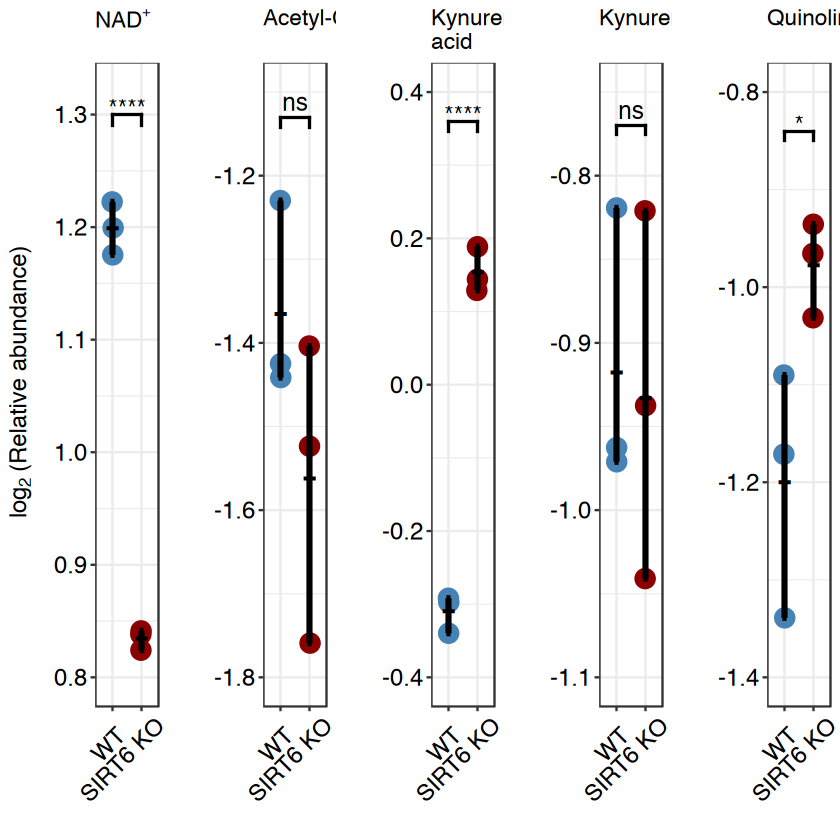

In [70]:
ggarrange(p1, p3, p4, p5, p6, align = 'hv',
          font.label = list(size = 22, face = "bold"),
          ncol = 5, nrow = 1)